<a href="https://colab.research.google.com/github/kashifalikhan36/Machine_learning_Resources/blob/main/ANN_House_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('kc_house_data.csv')

In [3]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
data=data[["price","bedrooms","bathrooms","sqft_living","sqft_lot","sqft_above","sqft_basement","yr_built"]]

<Axes: >

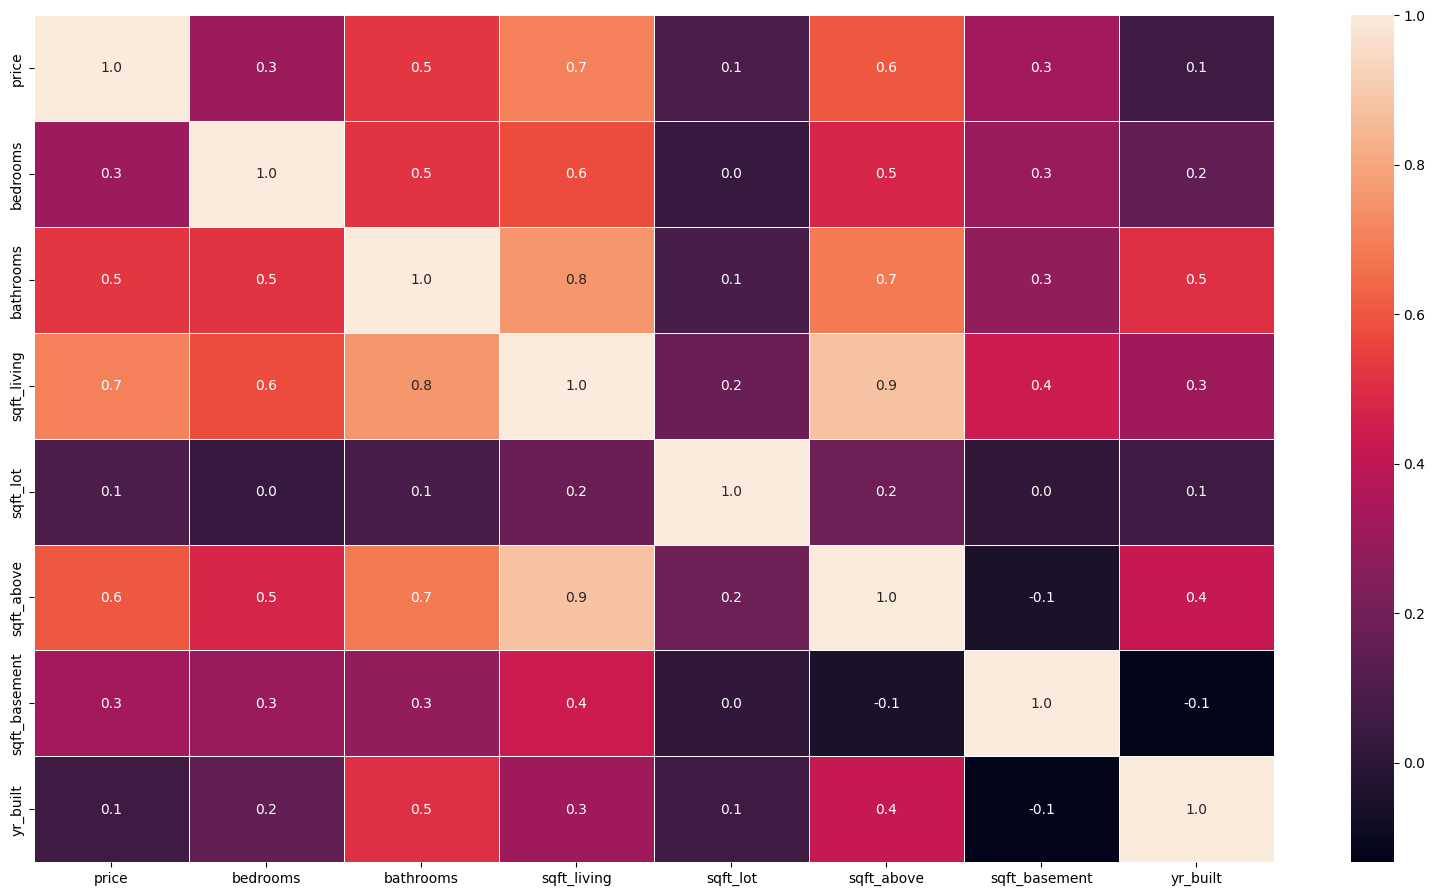

In [7]:
f, ax = plt.subplots(figsize=(20,11))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt='.1f', ax=ax)

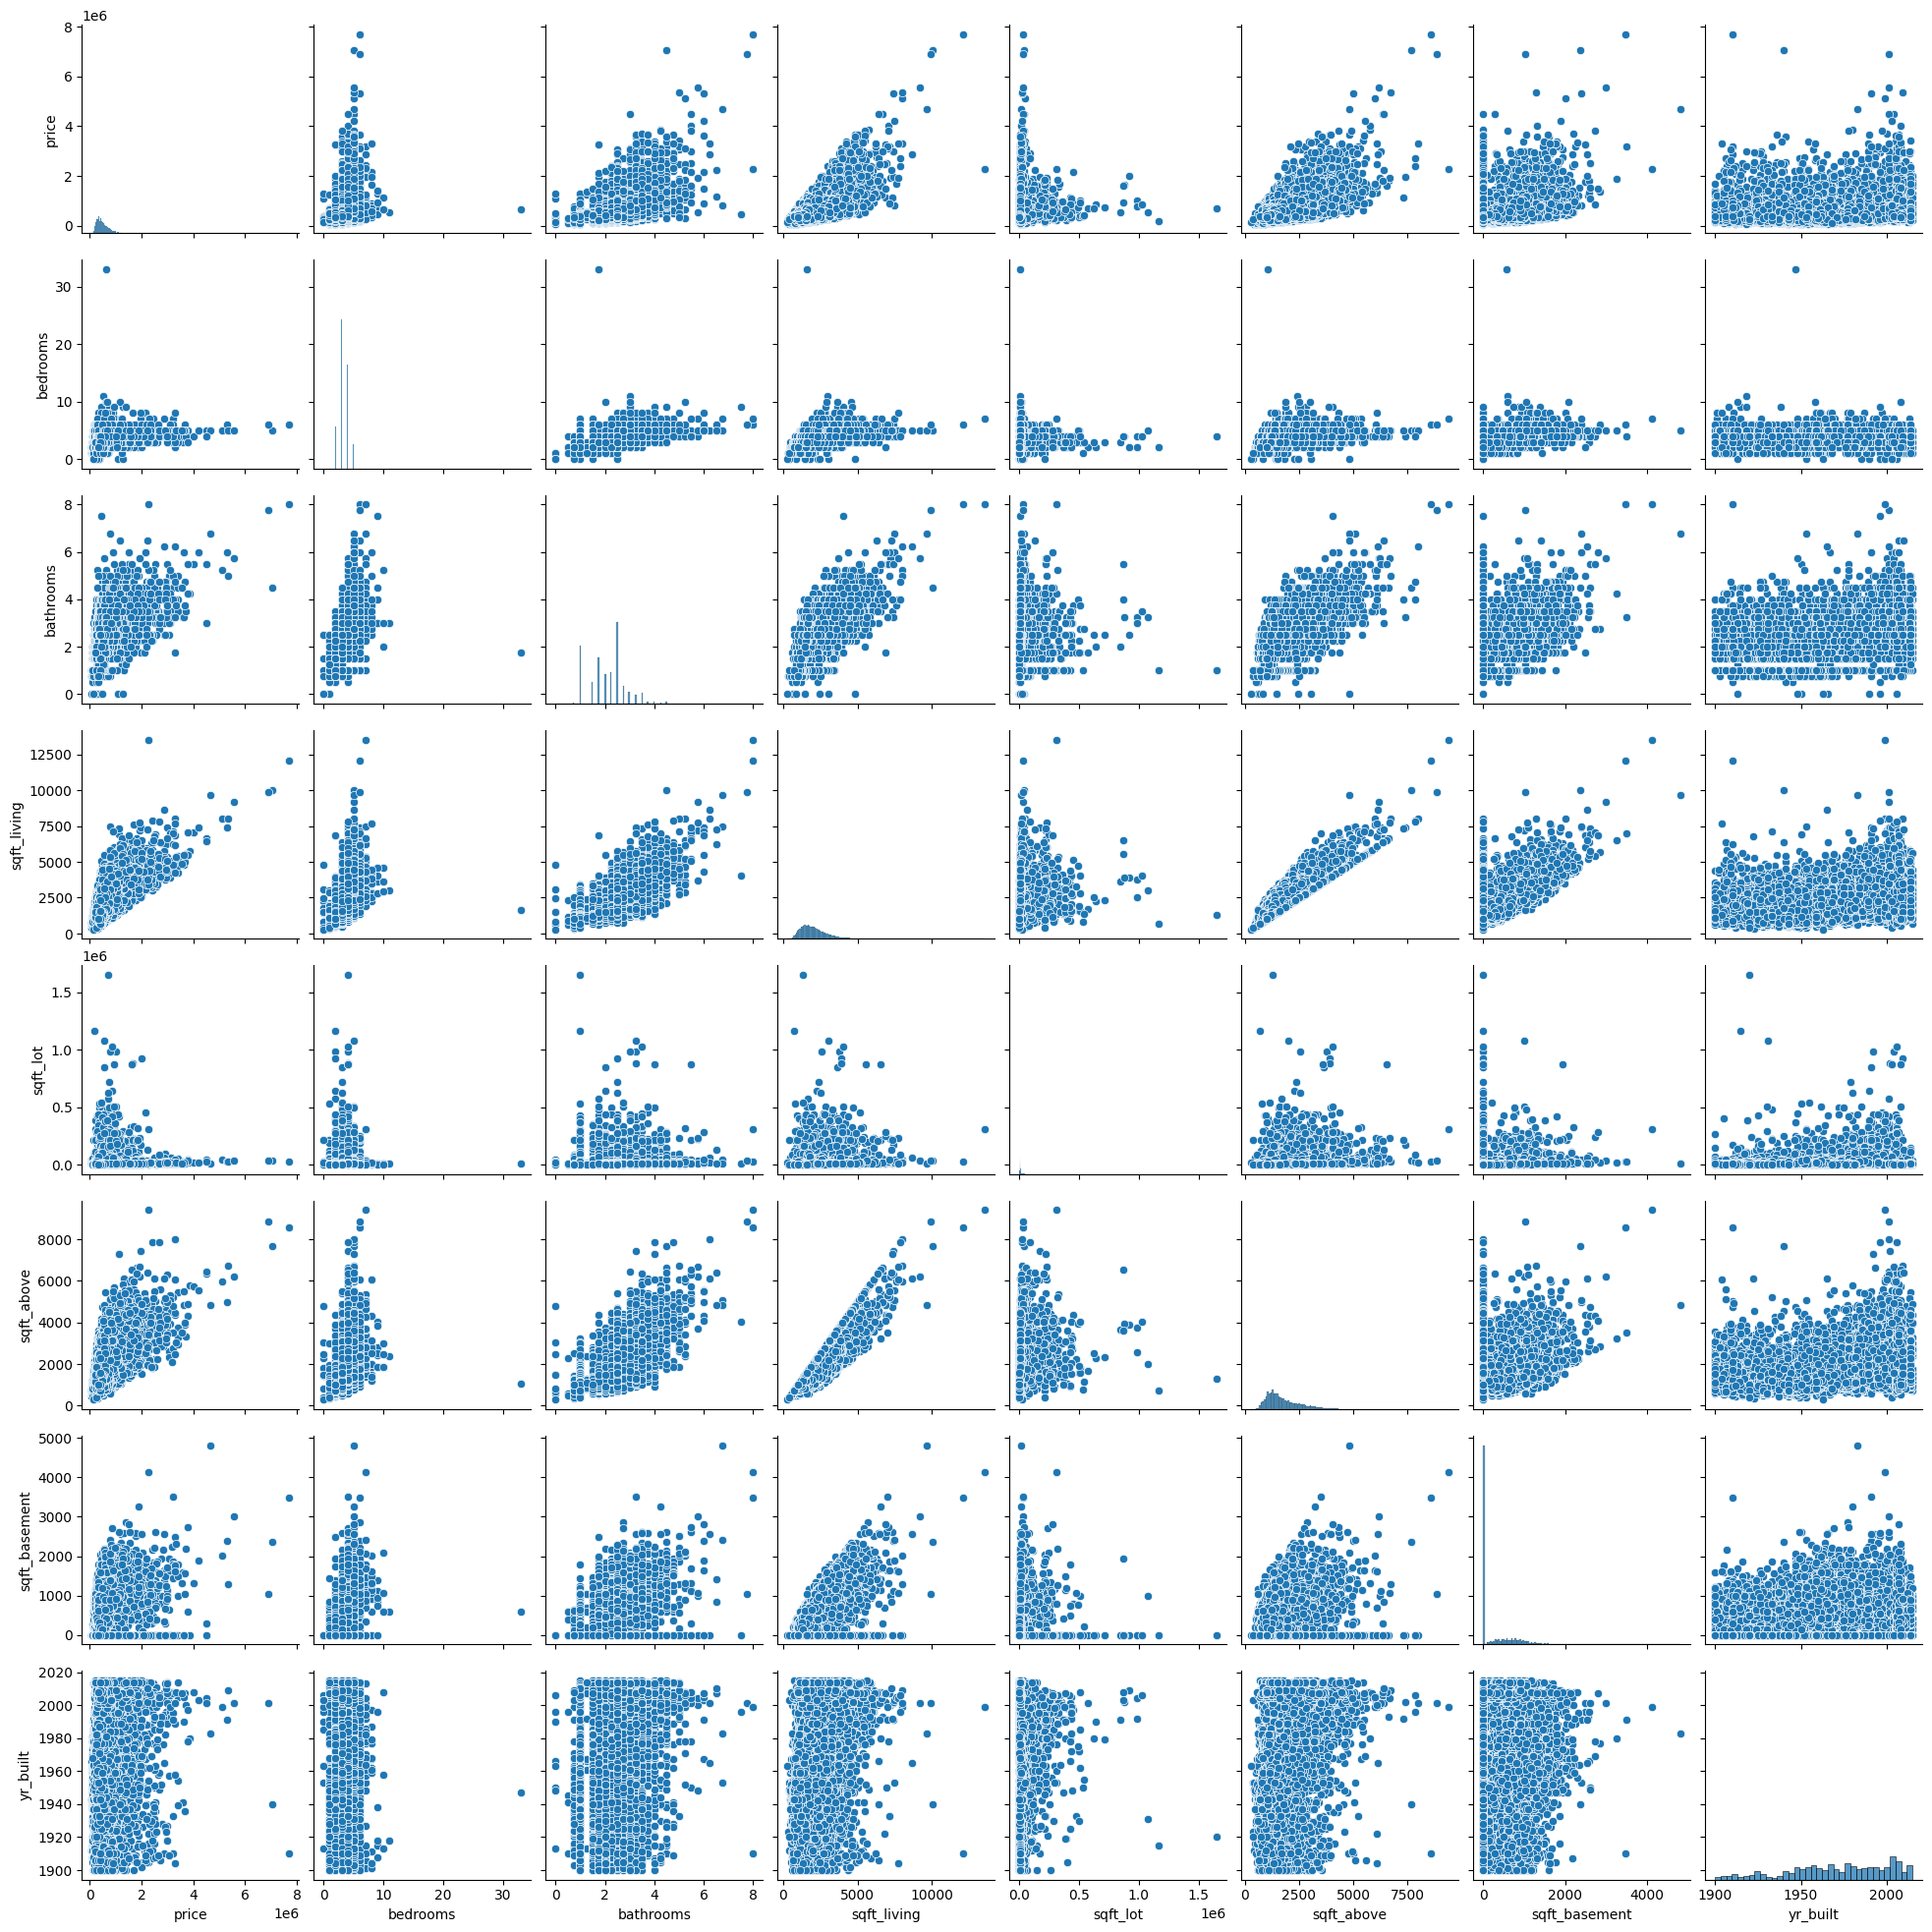

In [8]:
sns.pairplot(data)

In [13]:
y=data["price"]
x=data.drop("price",axis=1)

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(x)

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x_scaled,y,random_state=42,test_size=0.2)

In [16]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [24]:
model=Sequential()
model.add(Dense(50,input_dim=7,activation="relu"))
model.add(Dense(50,activation="relu"))
model.add(Dense(100,activation="relu"))
model.add(Dense(1,activation="linear"))

In [25]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                     │ (None, 50)                  │             400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 100)                 │           5,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,151 (31.84 KB)

 Trainable params: 8,151 (31.84 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
model.compile(optimizer='Adam',loss='mean_squared_error')

In [27]:
epochs_hist =model.fit(X_train,y_train,epochs=100,batch_size=50,validation_split=0.2)

Epoch 1/100
277/277 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 419220226048.0000 - val_loss: 385425211392.0000
Epoch 2/100
277/277 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 378278576128.0000 - val_loss: 191814778880.0000
Epoch 3/100
277/277 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 165869223936.0000 - val_loss: 91268456448.0000
Epoch 4/100
277/277 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 120137080832.0000 - val_loss: 88807161856.0000
Epoch 5/100
277/277 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 111972786176.0000 - val_loss: 86370639872.0000
Epoch 6/100
277/277 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 109772767232.0000 - val_loss: 83724427264.0000
Epoch 7/100
277/277 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 98078253056.0000 - val_loss: 80978616320.0000
Epoch 8/100
277/277 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 98250432512.0000 - val_loss: 78058618880.0000
Epoch 9/100
277/277 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 91864317952.0000 - val_loss: 74807959552.0000
Epoch 10/100
277/277 ━━━━━━━━

Text(0, 0.5, 'Training and Validation Losses')

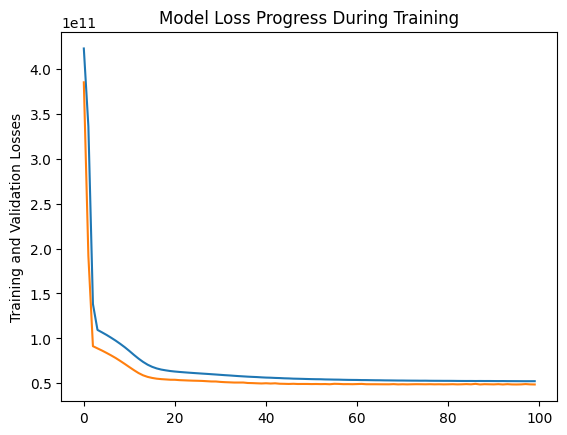

In [28]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.ylabel('Training and Validation Losses')

In [29]:
X_test_1=np.array([[4,5,1234,5678,1,2000,3000]])
scaller_1=MinMaxScaler()
X_test_1=scaller_1.fit_transform(X_test_1)
y_pred_1=model.predict(X_test_1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


In [30]:
y_pred_1

array([[253212.27]], dtype=float32)

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Text(0, 0.5, 'Predictions')

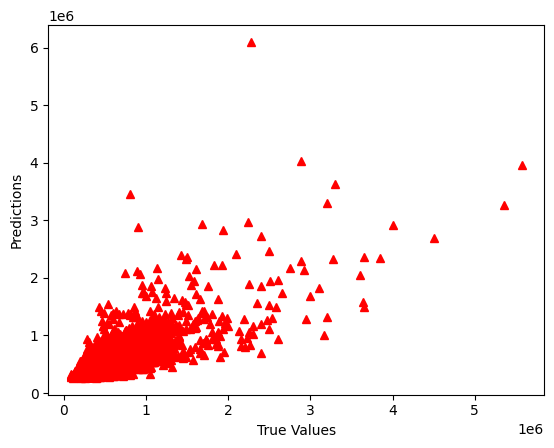

In [32]:
y_pred=model.predict(X_test)
plt.plot(y_test,y_pred,'^',color='r')
plt.xlabel('True Values')
plt.ylabel('Predictions')